In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Amazon Sale Report.csv')

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [33]:
df.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.shape

(128976, 21)

In [7]:
df.drop(['New', 'PendingS'], axis=1, inplace=True)

In [9]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [11]:
df.shape


(128976, 19)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(37514, 19)

In [15]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df(['ship-postal-code'] = df['ship-postal-code'].astype(int),inplace=True)


In [22]:
df['ship-postal-code'].dtype

dtype('int32')

In [26]:
df['Date'] = pd.to_datetime(df['Date'])


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

In [32]:
df.rename(columns={'Qty':'Quantity'},inplace=True)

In [35]:
df.describe(include='object')


,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [38]:
df[['Sales Channel', 'ship-country']].describe()

,Sales Channel,ship-country
count,37514,37514
unique,1,1
top,Amazon.in,IN
freq,37514,37514


# Exploratory Data Analysis

In [39]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


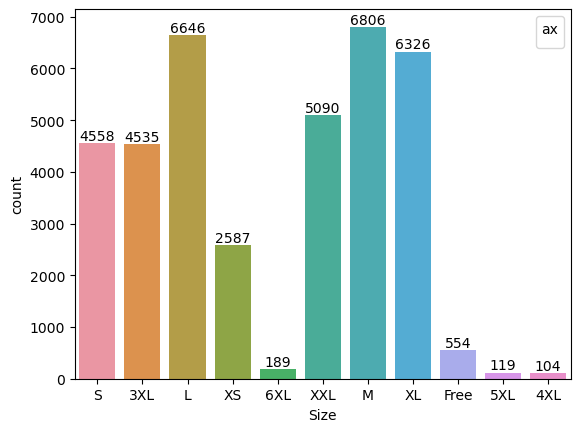

In [45]:
ax=sns.countplot(x='Size',data=df)

for bars in ax.containers:
    ax.bar_label(bars)
    ax.legend(title='ax', loc='upper right') 
plt.show()

In [46]:
df.groupby(['Size'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending = False)

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


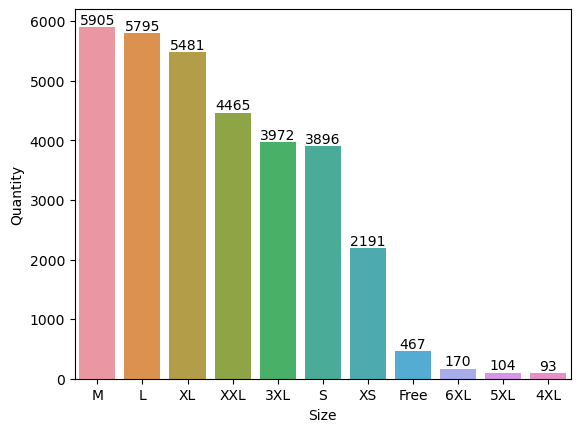

In [53]:
QBar = df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

# Create a bar plot
ax = sns.barplot(x='Size', y='Quantity', data=QBar)

for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

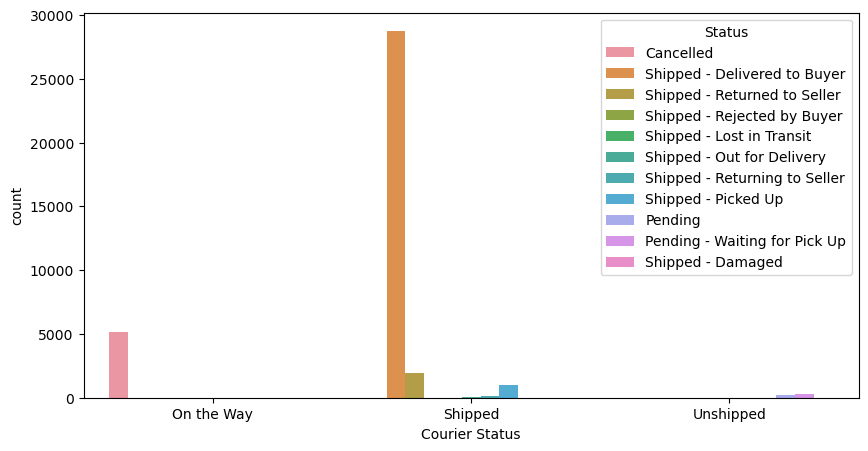

In [58]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='Courier Status',hue='Status')
plt.show()

<Axes: >

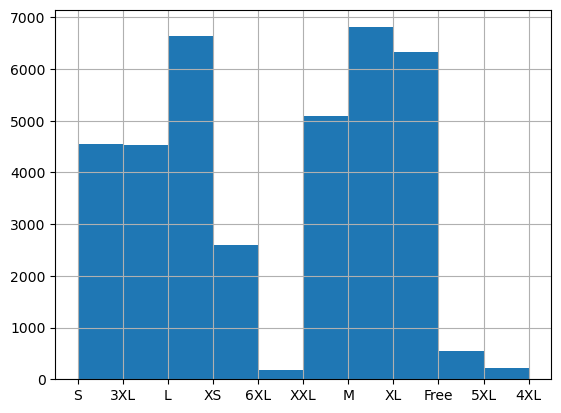

In [72]:
#histogram
df['Size'].hist()

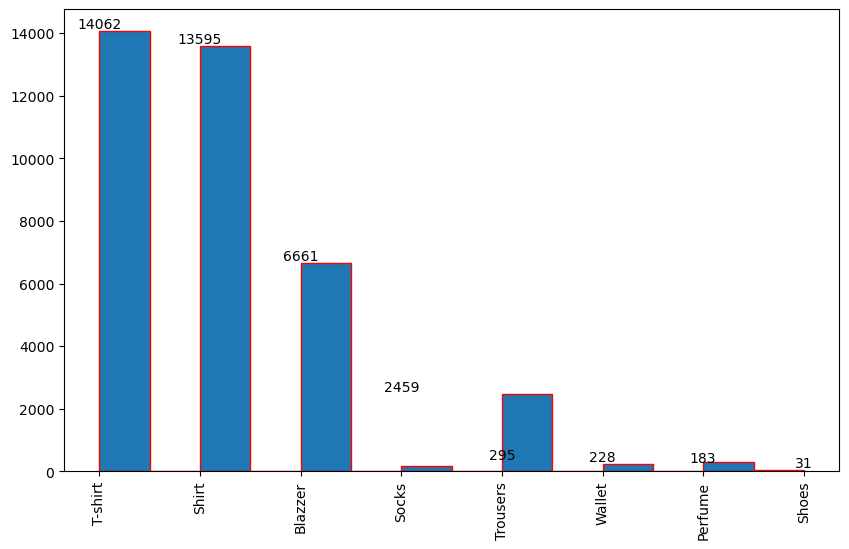

In [84]:
df['Category'] = df['Category'].astype(str)
Column_data =df['Category']
plt.figure(figsize=(10,6))
plt.hist(Column_data,bins=14,edgecolor='red')
for lbl, value in enumerate(category_counts.values):
    plt.text(lbl, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

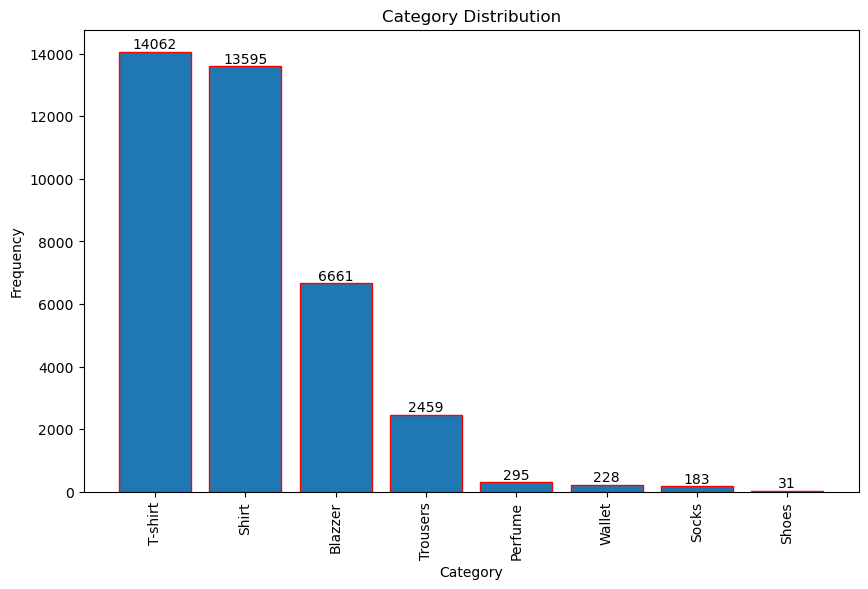

In [73]:
import matplotlib.pyplot as plt

# Convert 'Category' to string type (if not already)
df['Category'] = df['Category'].astype(str)

# Get the counts of each category
category_counts = df['Category'].value_counts()

# Plot the histogram (actually a bar plot for categorical data)
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, edgecolor='red')

# Add labels to each bar
for i, value in enumerate(category_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Category Distribution')

# Show the plot
plt.show()


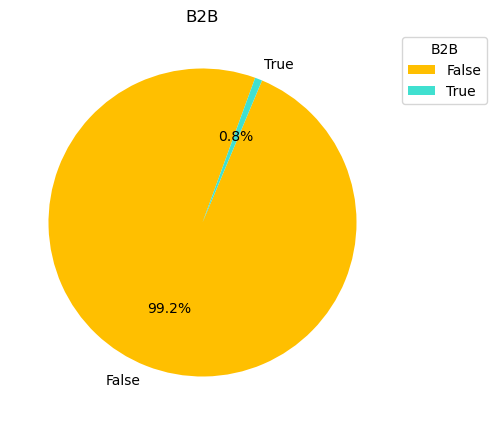

In [95]:
import matplotlib.pyplot as plt

# Get the counts of each category in 'B2B'
b2b_check = df['B2B'].value_counts()


colors = ['#FFBF00','#40E0D0']
# Create a pie chart
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(b2b_check, labels=b2b_check.index, autopct='%1.1f%%', startangle=70,colors=colors)

# Add a title
plt.title('B2B')

# Add a legend
plt.legend(wedges, b2b_check.index, title='B2B', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Display the chart
plt.show()


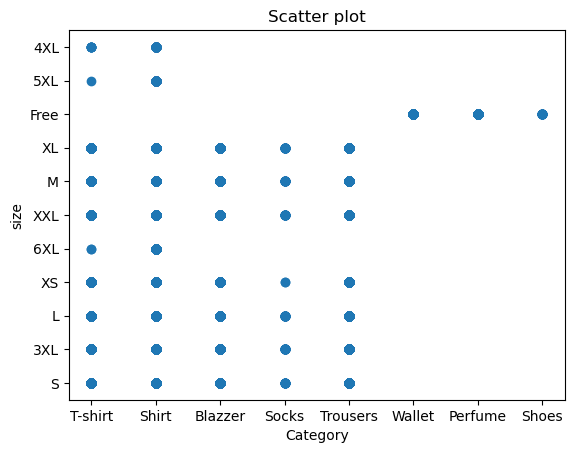

In [98]:
x=df['Category']
y=df['Size']
plt.scatter(x,y)
plt.xlabel('Category')
plt.ylabel('size')
plt.title('Scatter plot')
plt.show()

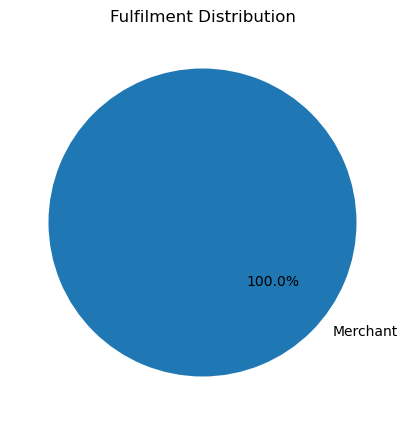

In [101]:
fulfilment_counts = df['Fulfilment'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(fulfilment_counts, labels=fulfilment_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Fulfilment Distribution')

# Display the chart
plt.show()

In [105]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship


In [9]:
shipstate_group = df.groupby('ship-state', as_index=False)
delivered_df = df[df['Status'] == 'Shipped - Delivered to Buyer']
delivered_stat = delivered_df.groupby('ship-state', as_index=False)['Amount'].sum()

print(delivered_stat)


                ship-state     Amount
0        ANDAMAN & NICOBAR    25878.0
1           ANDHRA PRADESH   769773.0
2        ARUNACHAL PRADESH    23947.0
3                    ASSAM   241201.0
4        Arunachal Pradesh      646.0
5        Arunachal pradesh      301.0
6                    BIHAR   326019.0
7                    Bihar     2511.0
8               CHANDIGARH    55839.0
9             CHHATTISGARH   153965.0
10              Chandigarh     1738.0
11         DADRA AND NAGAR    10888.0
12                   DELHI  1010085.0
13                   Delhi    19443.0
14                     GOA   157772.0
15                     Goa     5363.0
16                 Gujarat   729424.0
17                 HARYANA   658721.0
18        HIMACHAL PRADESH   132965.0
19         JAMMU & KASHMIR   111621.0
20               JHARKHAND   222527.0
21               KARNATAKA  2276500.0
22                  KERALA  1075034.0
23                  LADAKH     4431.0
24             LAKSHADWEEP      771.0
25          

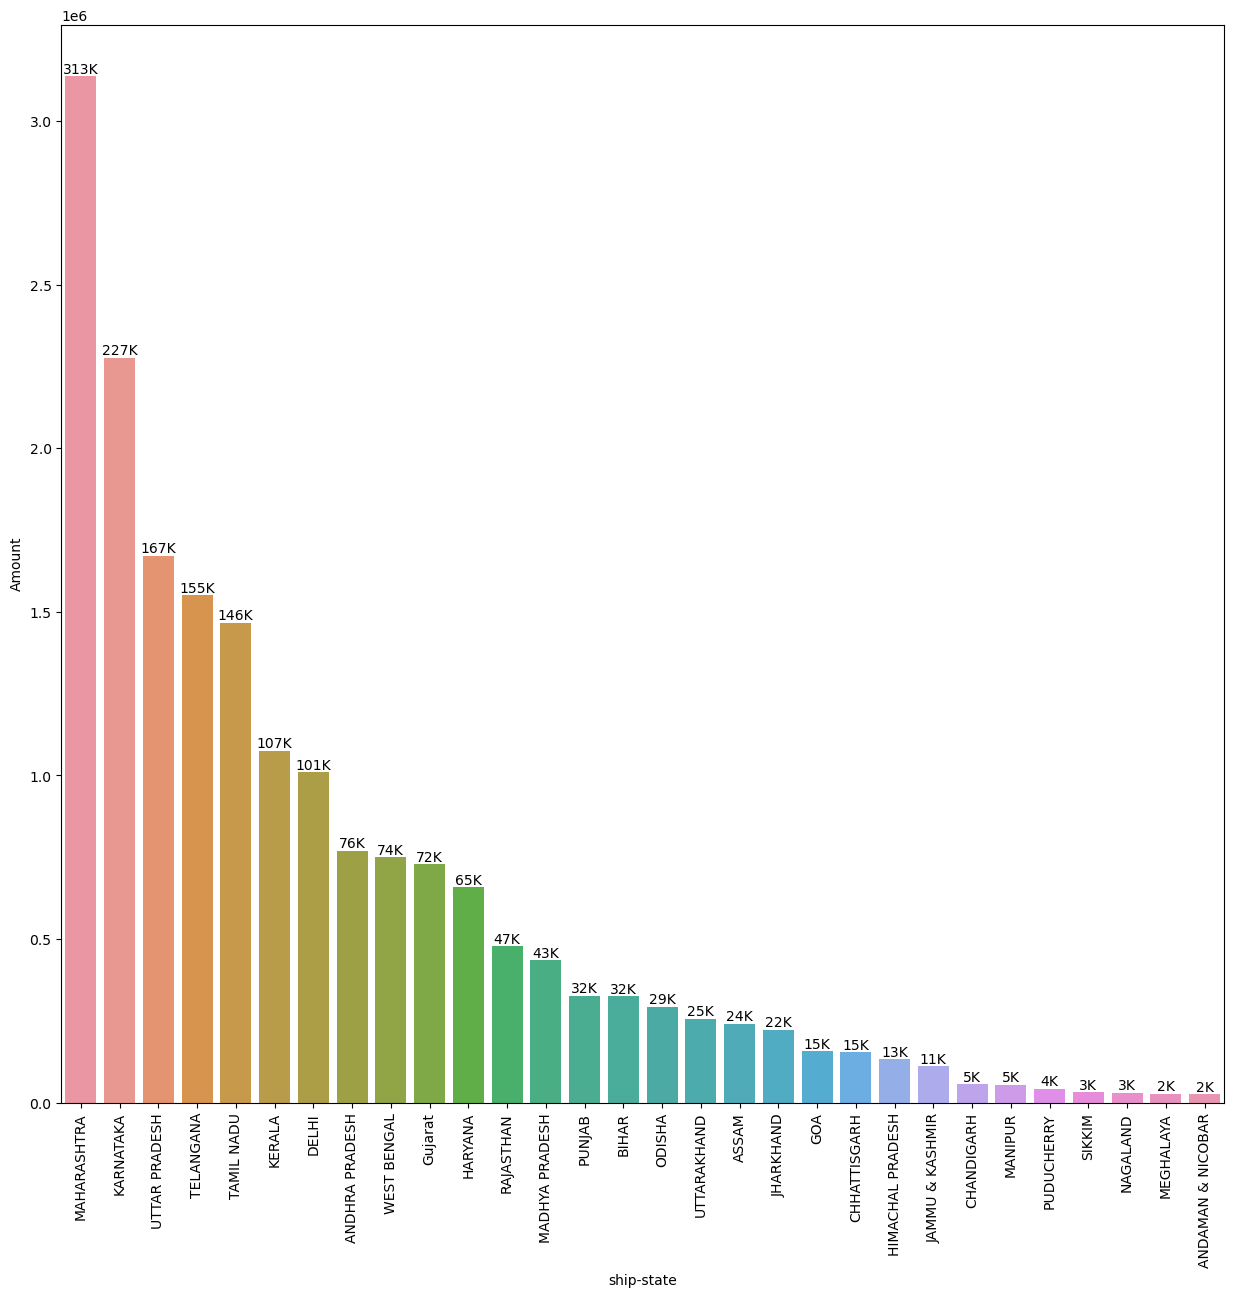

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'ship-state' and filter for 'Shipped - Delivered to Buyer'
delivered_df = df[df['Status'] == 'Shipped - Delivered to Buyer']
delivered_stat = delivered_df.groupby('ship-state', as_index=False)['Amount'].sum()

# Sort the DataFrame by 'Amount' and get the top 10 states
top_10_states = delivered_stat.sort_values(by='Amount', ascending=False).head(30)

# Create a bar plot
plt.figure(figsize=(15, 14))
ax = sns.barplot(x='ship-state', y='Amount', data=top_10_states)
plt.xticks(rotation=90)

# Add labels to the bars
for container in ax.containers:
    labels = [f'{int(v.get_height()/10000)}K' for v in container]
    ax.bar_label(container, labels=labels)


# Show the plot
plt.show()
